In [5]:
import os

mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-6.3.0-posix-seh-rt_v5-rev1\\mingw64\\bin';os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']


import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'
import pylab
import calendar
from scipy import stats
from datetime import datetime

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import  preprocessing, ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import log_loss
import xgboost as xgb
from sklearn.model_selection import learning_curve
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, log_loss


In [129]:
pd.set_option('display.max_colwidth', -1)

In [140]:
train_df1 = pd.read_json("E:/GA_TECH_DataMining/project/train.json")


In [141]:
test_df1 = pd.read_json("E:/GA_TECH_DataMining/project/test.json")

In [142]:
combinedDF =train_df1.append(test_df1)

#combinedDF.features.head(350)

In [143]:
combinedDF['num_features'] = combinedDF['features'].apply(lambda x : len(x))
combinedDF['dec_len'] = combinedDF['description'].apply(lambda x : len(x))
combinedDF['num_photos'] = combinedDF['photos'].apply(lambda x : len(x))
combinedDF['num_words'] = combinedDF['photos'].apply(lambda x : len(x))
#combinedDF['list_per_mgr'] = combinedDF['manager_id'].groupby(combinedDF['manager_id']).transform('sum')

combinedDF[['features','num_features', 'num_photos', 'photos']]
combinedDF["Doorman"] = combinedDF["features"].apply(lambda x: 1 if "Doorman" in x else 0)
combinedDF["Dogs_Allowed"] = combinedDF["features"].apply(lambda x: 1 if "Dogs Allowed" in x else 0)
combinedDF["Cats_Allowed"] = combinedDF["features"].apply(lambda x: 1 if "Cats Allowed" in x else 0)
combinedDF["Pets_Allowed"] = combinedDF["features"].apply(lambda x: 1 if "Pets Allowed Case by Case" in x else 0)
combinedDF["Elevator"] = combinedDF["features"].apply(lambda x: 1 if "Elevator" in x else 0)
combinedDF["Balcony"] = combinedDF["features"].apply(lambda x: 1 if "Balcony" in x else 0)
combinedDF["Hardwood"] = combinedDF["features"].apply(lambda x: 1 if "Hardwood Floors" in x else 0)
combinedDF["Internet_Mention"] = combinedDF["features"].apply(lambda x: 1 if "High Speed Internet" in x else 0)
combinedDF["Loft"] = combinedDF["features"].apply(lambda x: 1 if "Loft" in x else 0)
combinedDF["Outdoors"] = combinedDF["features"].apply(lambda x: 1 if "Outdoor Space" in x else 0)
combinedDF["New"] = combinedDF["features"].apply(lambda x: 1 if "New Construction" in x else 0)
combinedDF["No_fee"] = combinedDF["features"].apply(lambda x: 1 if " No Fee" in x else 0)
combinedDF["Gym"] = combinedDF["features"].apply(lambda x: 1 if "Fitness Center" in x else 0)
combinedDF["Parking"] = combinedDF["features"].apply(lambda x: 1 if "Parking" in x else 0)
combinedDF["Storage"] = combinedDF["features"].apply(lambda x: 1 if "Storage" in x else 0)
combinedDF["Sunlight"] = combinedDF["features"].apply(lambda x: 1 if "Skylight" in x else 0)
combinedDF["Pool"] = combinedDF["features"].apply(lambda x: 1 if "Swimming Pool" in x else 0)
combinedDF["Laundry_Room"] = combinedDF["features"].apply(lambda x: 1 if "Laundry In Building" in x else 0)
combinedDF["Wash_Dry"] = combinedDF["features"].apply(lambda x: 1 if "Washer/Dryer" in x else 0)
combinedDF["Dishwasher"] = combinedDF["features"].apply(lambda x: 1 if "Dishwasher" in x else 0)
combinedDF["Prewar"] = combinedDF["features"].apply(lambda x: 1 if "Pre-War" in x else 0)
combinedDF["AirCon"] = combinedDF["features"].apply(lambda x: 1 if "Air Conditioning" in x else 0)
combinedDF["date_created"] = pd.to_datetime(combinedDF["created"])
combinedDF["weekday_created"] = pd.to_datetime(combinedDF["date_created"]).dt.weekday
combinedDF["hour_of_day_created"] = pd.to_datetime(combinedDF["date_created"]).dt.hour


In [144]:
combinedDF['list_per_mgr'] = combinedDF.groupby('manager_id', as_index=False)['manager_id'].transform(lambda s: s.count())

In [145]:
train_df = combinedDF[combinedDF.interest_level.notnull()]
test_df = combinedDF[combinedDF.interest_level.isnull()]
test_df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,...,Pool,Laundry_Room,Wash_Dry,Dishwasher,Prewar,AirCon,date_created,weekday_created,hour_of_day_created,list_per_mgr
0,1.0,1,79780be1514f645d7e6be99a3de696c5,2016-06-11 05:29:41,"Large with awesome terrace--accessible via bedroom and living room. Unique find in the LES.Apartment Features:-Large terrace via bedroom and living room-Hardwood floors-Newly renovated -Granite counter top-Breakfast Bar-Ample counter space and storage-Dishwasher-Great Lighting Neighborhood Features:-A few blocks from Whole Foods-1 block from the J, Z and M subway-All the restaurants and night life the Lower East Side is known for (Hotel Chantel, DL, Pianos)Call/txt/Email James to set up a showing:kagglemanager@renthop.com<br /><br /><br /><br /><br /><br /><p><a website_redacted",Suffolk Street,"[Elevator, Laundry in Building, Laundry in Unit, Dishwasher, Hardwood Floors, Outdoor Space]",NaN,40.7185,7142618,...,0,0,0,1,0,0,2016-06-11 05:29:41,5,5,62
1,1.0,2,0,2016-06-24 06:36:34,"Prime Soho - between Bleecker and Houston - Newly renovated, with stainless steel appliances, hardwood floors, marble bath. Convenient to world class restaurants, shopping, galleries. Subway C,E,B,D,F,M. To schedule a viewing call Andrew today.",Thompson Street,"[Pre-War, Dogs Allowed, Cats Allowed]",NaN,40.7278,7210040,...,0,0,0,0,1,0,2016-06-24 06:36:34,4,6,26
100,1.0,1,3dbbb69fd52e0d25131aa1cd459c87eb,2016-06-03 04:29:40,"New York chic has reached a new level at 101 East 10th Street. Located on a prime corner in the East Village, steps from Union Square and Greenwich Village, it is sure to up the ante for coveted living spaces. 101 East 10th Street offers bespoke finishes, stainless appliances, marble bathrooms, ample closet space, and incredible natural light resulting in a rare genre of urban living.<br /><br />**Landlord is Offering 1 Month Free (12 month lease) - Advertised Rent is the Net Effective** <br /><br />Apartment Features:<br />• Built in A/C<br />• Brand New Renovations<br />• In Unit Laundry<br />• Stainless Steel Appliances<br />• Dishwasher<br />• Marble Bathrooms<br />• Oak Wood Flooring<br /> <br />Building Features:<br />• Part-time Doorman<br />• Virtual Doorman<br />• Brand New Common Area Renovations<br />• Renovated Hallways<br />• Elevator<br />• Unbeatable Union Square Location<br />• Steps to Whole Foods, Trader Joes & Westside Market<br /> <br />Contact leasing to schedule a viewing: kagglemanager@renthop.com",101 East 10th Street,"[Doorman, Elevator, No Fee]",NaN,40.7306,7103890,...,0,0,0,0,0,0,2016-06-03 04:29:40,4,4,5
1000,1.0,2,783d21d013a7e655bddc4ed0d461cc5e,2016-06-11 06:17:35,"Step into this fantastic new Construction in the heart of Williamsburg. This modern brand new apartment is the ultimate expression of modern living. The apartment boasts floor to ceiling windows, eco friendly bamboo flooring flowing from wall to wall and a video intercom. Considerable thought has gone into the kitchen design and details. White lacquer and frosted glass cabinetry and white quartz countertops provide a bright setting for storing and slicing, while a stainless steel appliance package including a wine chiller enhances serving dinner for two or hosting a larger crowd. Bathroom features white glass and grey ceramic tiles, a white custom oak vanity ,an over-sized soaking tub and separate, glass-enclosed steam shower, The apartment also has it's own storage space in the building and a private balcony! The building features a warm common back garden, a serene rooftop deck with views over the surrounding tree lined streetsYour new apartment is just steps away from everything that makes Williamsburg unique: emerging-designer boutiques, bars and chef-run restaurants. The city is just minutes away by L train at Bedford Avenue or Lorimer Street stops. Contact me today to set up your exclusive viewing at kagglemanager@renthop.com or 966-636-7822<br />

In [146]:
test_df = test_df.drop('interest_level',axis=1)


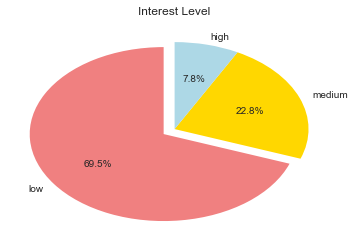

In [80]:
labels = ["low","medium","high"]
sizes = train_df.interest_level.value_counts().values
explode=[0.1,0,0]
colors = ['lightcoral','gold','lightblue']
patches, texts,autotexts= plt.pie(sizes, labels=labels,colors=colors,explode=explode,autopct="%1.1f%%",
                        startangle=90)
plt.title("Interest Level")
plt.show()

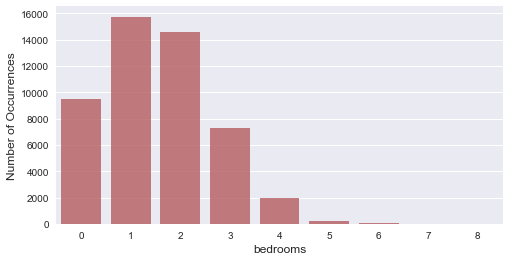

In [83]:
cnt_srs = train_df['bedrooms'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bedrooms', fontsize=12)
plt.show()

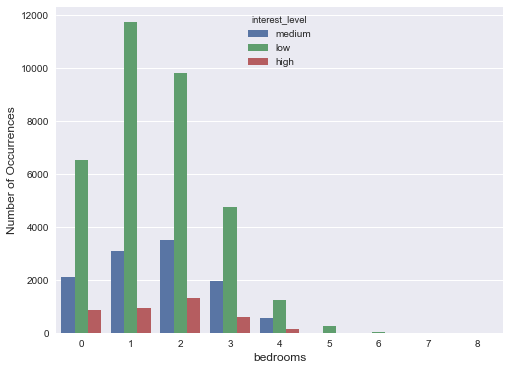

In [84]:
plt.figure(figsize=(8,6))
sns.countplot(x='bedrooms', hue='interest_level', data=train_df)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bedrooms', fontsize=12)
plt.show()

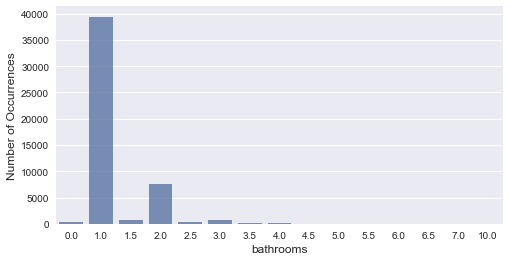

In [47]:
cnt_srs = train_df['bathrooms'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bathrooms', fontsize=12)
plt.show()

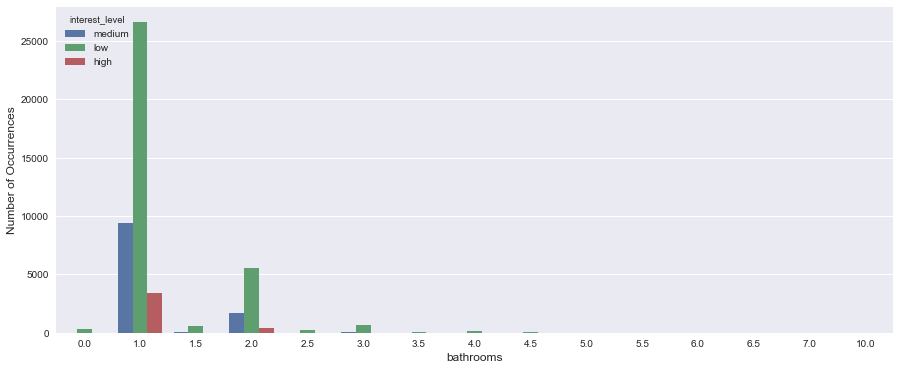

In [48]:
plt.figure(figsize=(15,6))
sns.countplot(x='bathrooms', hue='interest_level', data=train_df)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bathrooms', fontsize=12)
plt.show()

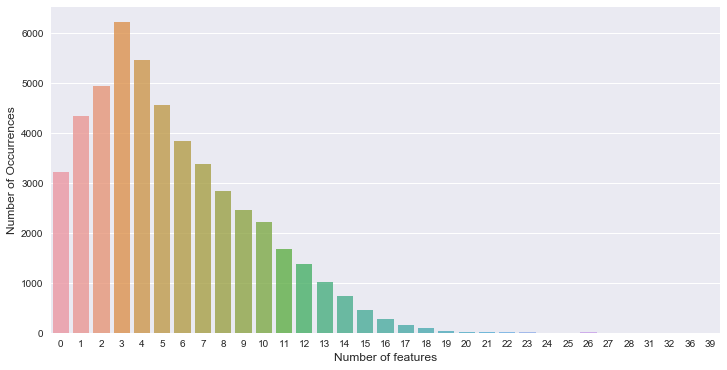

In [85]:
#train_df["num_features"] = train_df["features"].apply(len)
cnt_srs = train_df['num_features'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of features', fontsize=12)
plt.show()

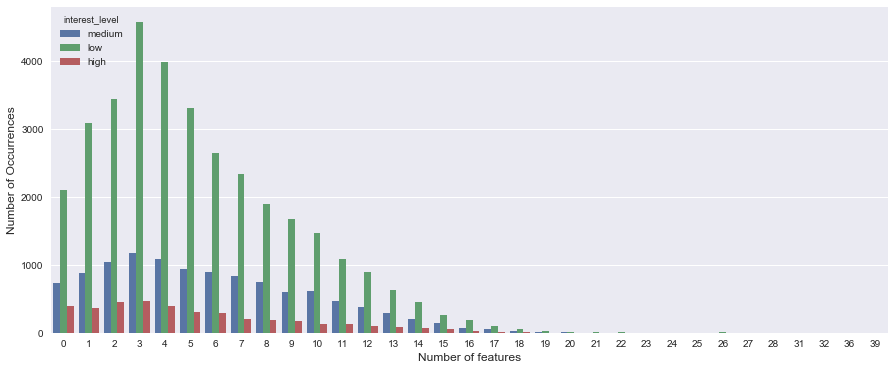

In [55]:
plt.figure(figsize=(15,6))
sns.countplot(x='num_features', hue='interest_level', data=train_df)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of features', fontsize=12)
plt.show()

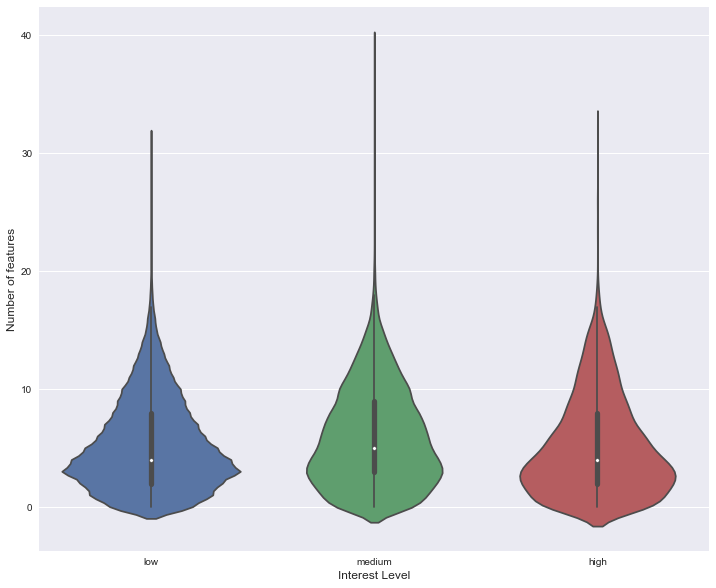

In [100]:
#train_df1['num_features'].ix[train_df['num_features']>17] = 17
plt.figure(figsize=(12,10))
sns.violinplot(y="num_features", x="interest_level", data=train_df, order =['low','medium','high'])
plt.xlabel('Interest Level', fontsize=12)
plt.ylabel('Number of features', fontsize=12)
plt.show()

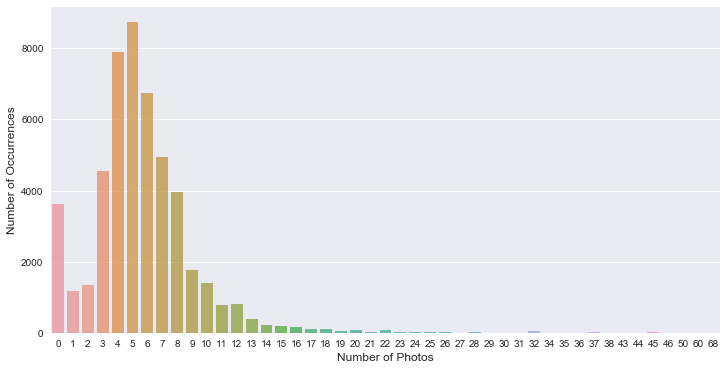

In [99]:
#train_df["num_photos"] = train_df["photos"].apply(len)
cnt_srs = train_df['num_photos'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.xlabel('Number of Photos', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()


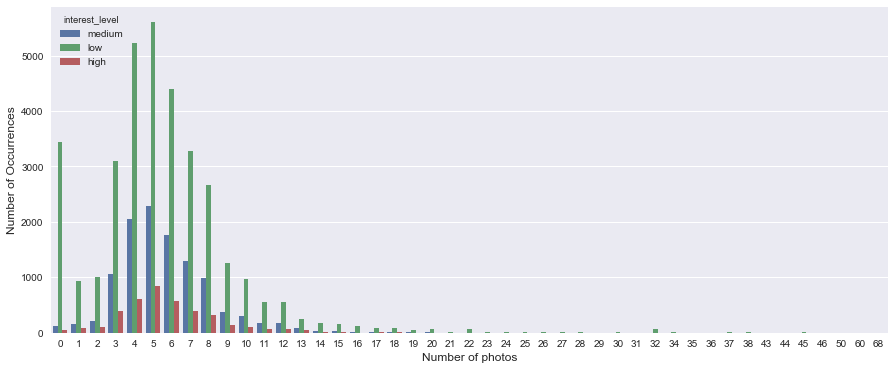

In [58]:
plt.figure(figsize=(15,6))
sns.countplot(x='num_photos', hue='interest_level', data=train_df)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of photos', fontsize=12)
plt.show()

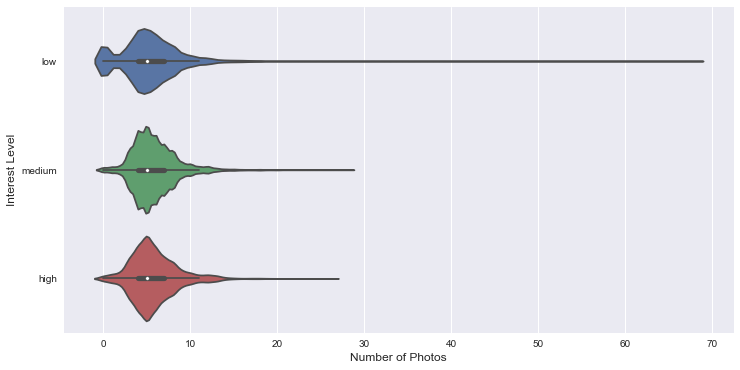

In [57]:
plt.figure(figsize=(12,6))
sns.violinplot(x="num_photos", y="interest_level", data=train_df, order =['low','medium','high'])
plt.xlabel('Number of Photos', fontsize=12)
plt.ylabel('Interest Level', fontsize=12)
plt.show()

Latitude and Longitude

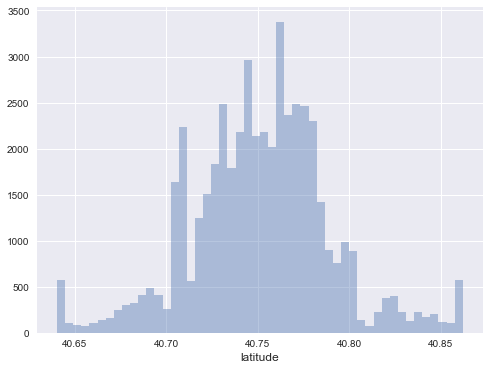

In [101]:
llimit = np.percentile(train_df.latitude.values, 1)
ulimit = np.percentile(train_df.latitude.values, 99)
train_df['latitude'].ix[train_df['latitude']<llimit] = llimit
train_df['latitude'].ix[train_df['latitude']>ulimit] = ulimit

plt.figure(figsize=(8,6))
sns.distplot(train_df.latitude.values, bins=50, kde=False)
plt.xlabel('latitude', fontsize=12)
plt.show()

So the latitude values are primarily between 40.6 and 40.9. Now let us look at the longitude values

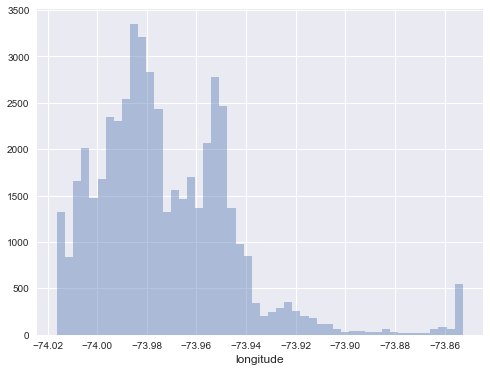

In [65]:
llimit = np.percentile(train_df.longitude.values, 1)
ulimit = np.percentile(train_df.longitude.values, 99)
train_df['longitude'].ix[train_df['longitude']<llimit] = llimit
train_df['longitude'].ix[train_df['longitude']>ulimit] = ulimit

plt.figure(figsize=(8,6))
sns.distplot(train_df.longitude.values, bins=50, kde=False)
plt.xlabel('longitude', fontsize=12)
plt.show()

The longitude values range between -73.8 and -74.02. So the data corresponds to the New York City

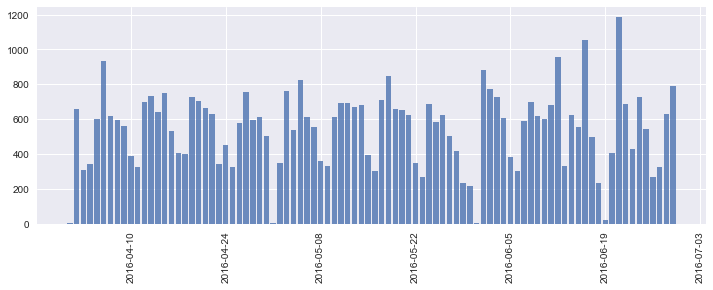

In [102]:

cnt_srs = train_df['date_created'].value_counts()

plt.figure(figsize=(12,4))
ax = plt.subplot(111)
ax.bar(cnt_srs.index, cnt_srs.values, alpha=0.8)
ax.xaxis_date()
plt.xticks(rotation='vertical')
plt.show()

So we have data from April to June 2016 in our train set. Now let us look at the test set as well and see if they are also from the same date range.

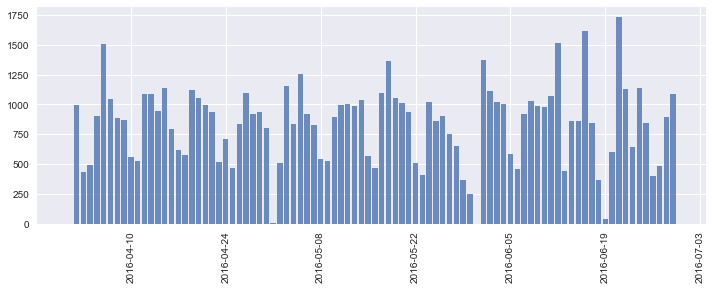

In [103]:
cnt_srs = test_df['date_created'].value_counts()

plt.figure(figsize=(12,4))
ax = plt.subplot(111)
ax.bar(cnt_srs.index, cnt_srs.values, alpha=0.8)
ax.xaxis_date()
plt.xticks(rotation='vertical')
plt.show()

Looks very similar to the train set dates and so we are good to go.!

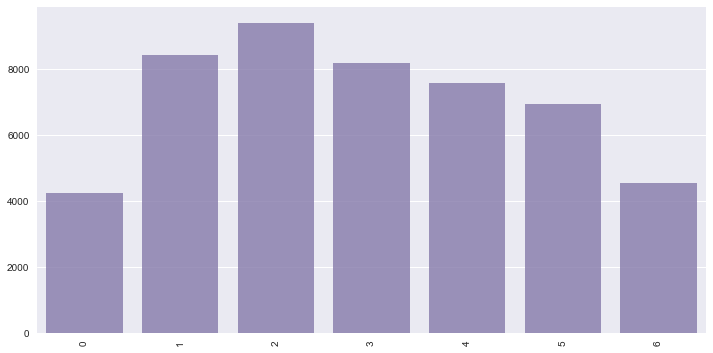

In [137]:
cnt_srs = train_df['weekday_created'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.show()

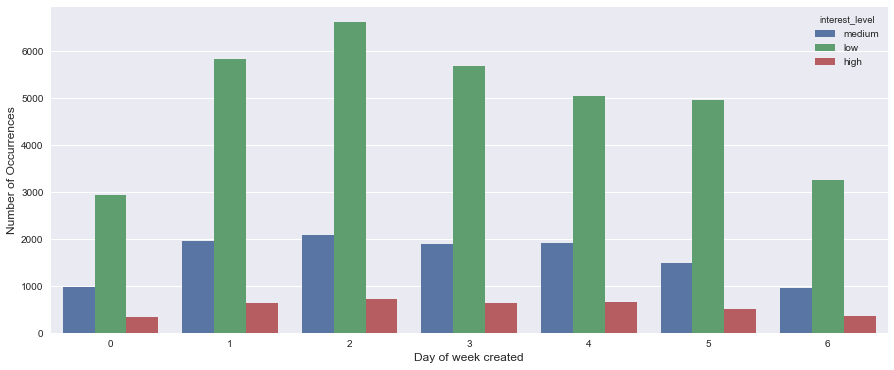

In [138]:
plt.figure(figsize=(15,6))
sns.countplot(x='weekday_created', hue='interest_level', data=train_df)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Day of week created', fontsize=12)
plt.show()

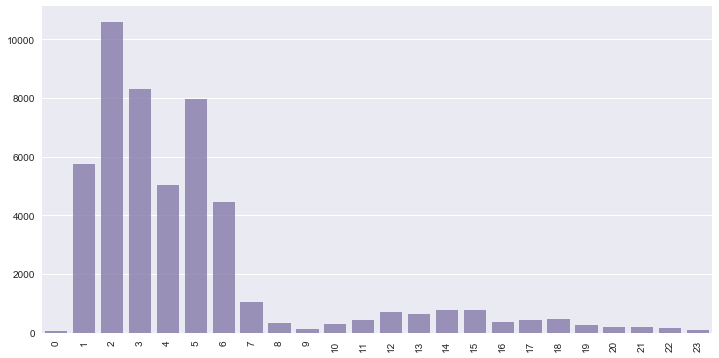

In [147]:
cnt_srs = train_df['hour_of_day_created'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.show()

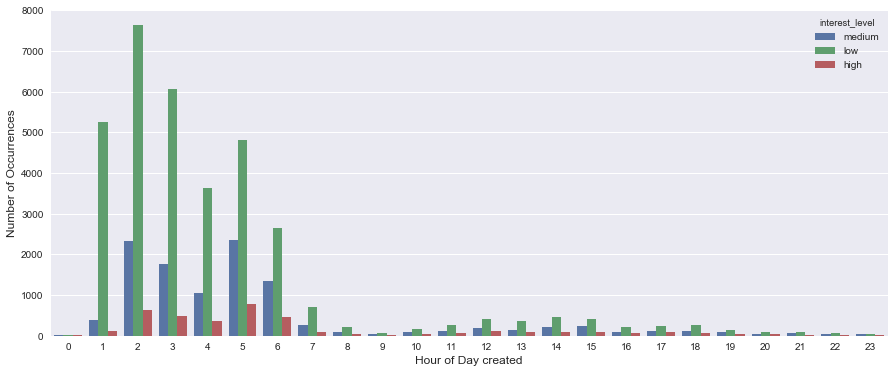

In [148]:
plt.figure(figsize=(15,6))
sns.countplot(x='hour_of_day_created', hue='interest_level', data=train_df)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Hour of Day created', fontsize=12)
plt.show()

Looks like listings are created during the early hours of the day (1 to 6am). May be that is when the traffic is less and so the updates are happening.

In [152]:

#X = train_df[['bathrooms','bedrooms','longitude','latitude','price','num_features','num_photos','Doorman','Dogs_Allowed','Cats_Allowed','Pets_Allowed','Elevator','Balcony','Hardwood','Internet_Mention','Loft','Outdoors','New','No_fee','Gym','Parking','Storage','Sunlight','Pool','Laundry_Room','Wash_Dry','Dishwasher','Prewar','AirCon']]
X = train_df[['bathrooms','bedrooms','longitude','latitude','price','num_features','num_photos','weekday_created','hour_of_day_created','list_per_mgr','dec_len','Pets_Allowed','Hardwood','No_fee','Parking','Storage','Sunlight','Laundry_Room','Wash_Dry','Prewar','AirCon']]
X.index = train_df['listing_id']
target_num_map = {'high':0, 'medium':1, 'low':2}
train_y = np.array(train_df['interest_level'].apply(lambda x: target_num_map[x]))
X.head()
#y.head()
#train_y

,bathrooms,bedrooms,longitude,latitude,price,num_features,num_photos,weekday_created,hour_of_day_created,list_per_mgr,...,Pets_Allowed,Hardwood,No_fee,Parking,Storage,Sunlight,Laundry_Room,Wash_Dry,Prewar,AirCon
listing_id,,,,,,,,,,,,,,,,,,,,,
7211212,1.5,3,-73.9425,40.7145,3000,0,5,4,7,235,...,0,0,0,0,0,0,0,0,0,0
7150865,1.0,2,-73.9667,40.7947,5465,5,11,6,12,194,...,0,0,0,0,0,0,0,0,0,0
6887163,1.0,1,-74.0018,40.7388,2850,4,8,6,3,314,...,1,1,0,0,0,0,1,0,0,0
6888711,1.0,1,-73.9677,40.7539,3275,2,3,0,2,470,...,0,1,0,0,0,0,0,0,0,0
6934781,1.0,4,-73.9493,40.8241,3350,1,3,3,1,51,...,0,0,0,0,0,0,0,0,1,0


In [153]:
Xtest = test_df[['bathrooms','bedrooms','longitude','latitude','price','num_features','num_photos','weekday_created','hour_of_day_created','list_per_mgr','dec_len','Pets_Allowed','Hardwood','No_fee','Parking','Storage','Sunlight','Laundry_Room','Wash_Dry','Prewar','AirCon']]
Xtest.index = test_df['listing_id']
Xtest.head()

,bathrooms,bedrooms,longitude,latitude,price,num_features,num_photos,weekday_created,hour_of_day_created,list_per_mgr,...,Pets_Allowed,Hardwood,No_fee,Parking,Storage,Sunlight,Laundry_Room,Wash_Dry,Prewar,AirCon
listing_id,,,,,,,,,,,,,,,,,,,,,
7142618,1.0,1,-73.9865,40.7185,2950,6,8,5,5,62,...,0,1,0,0,0,0,0,0,0,0
7210040,1.0,2,-74.0000,40.7278,2850,3,3,4,6,26,...,0,0,0,0,0,0,0,0,1,0
7103890,1.0,1,-73.9890,40.7306,3758,3,6,4,4,5,...,0,0,0,0,0,0,0,0,0,0
7143442,1.0,2,-73.9571,40.7109,3300,10,6,5,6,178,...,0,1,0,0,0,0,0,0,0,0
6860601,2.0,2,-73.9845,40.7650,4900,14,7,1,5,168,...,0,1,0,0,0,0,1,0,1,0


In [99]:
#Ignore this piece of code
#param_grid = {'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
              #'n_estimators' : [500, 1000, 1500]}
param_grid = {'max_depth': [3,5,7]}
            # 'min_child_weight' : [1,3,5]
  #           }
#param_grid = {'max_depth': [2,3,5]}
    

param_fixed = { 'objective' : 'multi:softprob'
              }


In [ ]:
#You can ignore this piece of code

model = XGBClassifier(objective='multi:softprob',nthread=10, seed=27, learning_rate=0.01,max_delta_step = 1,n_estimators=500)
#kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, scoring="neg_log_loss", cv=10)
grid_result = grid_search.fit(X, train_y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
grid_result.return_train_score
# plot
#plt.errorbar(learning_rate, means, yerr=stds)
#plt.title("XGBoost learning_rate vs Log Loss")
#plt.xlabel('learning_rate')
#plt.ylabel('Log Loss')

In [ ]:
#Ignore this piece of code
estimator = XGBClassifier(objective='multi:softprob',learning_rate= 0.01,seed=27,n_estimators=30)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
train_sizes, train_scores, test_scores = learning_curve(
    estimator, X, train_y, cv=cv, scoring="neg_log_loss", n_jobs=-1, train_sizes=np.linspace(.1,1., 10))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.gca().invert_yaxis()
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [156]:
dtrain = xgb.DMatrix(data=X, label=train_y)
#params = {'max_depth':5, 'eta':0.3,  'objective':'multi:softprob', 'eval_metric':'mlogloss','num_class':3}
#params = { 'objective':'multi:softprob', 'eval_metric':'mlogloss','num_class':3,'learning_rate':'0.01','max_depth':'3','max_delta_step':'1',
 #           'min_child_weight':0}

params = { 'objective':'multi:softprob', 'eval_metric':'mlogloss','num_class':3,'learning_rate':'0.01','max_depth':'4','max_delta_step':'1',
            'min_child_weight':100}
    
num_round = 100
print ('running cross validation')
# do cross validation, this will print result out as
# [iteration]  metric_name:mean_value+std_value
# std_value is standard deviation of the metric
#kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
xcv =xgb.cv(params,dtrain, num_boost_round=1000,seed = 7,folds=10, early_stopping_rounds=3)
xcv

#xgb.train(params,dtrain)
#dtrain.feature_names

running cross validation


,test-mlogloss-mean,test-mlogloss-std,train-mlogloss-mean,train-mlogloss-std
0,1.093331,0.000040,1.093303,0.000029
1,1.088106,0.000082,1.088048,0.000061
2,1.082955,0.000096,1.082870,0.000065
3,1.077841,0.000143,1.077726,0.000103
4,1.072822,0.000151,1.072679,0.000096
5,1.067835,0.000177,1.067662,0.000115
6,1.062921,0.000183,1.062721,0.000107
7,1.058075,0.000188,1.057849,0.000095
8,1.053267,0.000215,1.053011,0.000111
9,1.048523,0.000216,1.048241,0.000098


In [157]:
#xgb.plot_importance(xcv)
#pyplot.show()
#train_params = { 'objective':'multi:softprob', 'eval_metric':'mlogloss','num_class':3,'learning_rate':0.01,'max_depth':'3','max_delta_step':'1','early_stopping_rounds':'3'}
train_params = { 'objective':'multi:softprob', 'eval_metric':'mlogloss','num_class':3,'learning_rate':0.01,'max_depth':'4','max_delta_step':'1','early_stopping_rounds':'3','min_child_weight':'100'}
final_gb = xgb.train(train_params,dtrain,num_boost_round=1000)


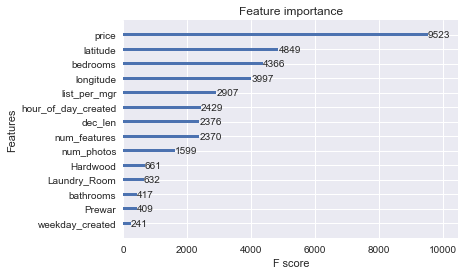

In [158]:
xgb.plot_importance(final_gb)

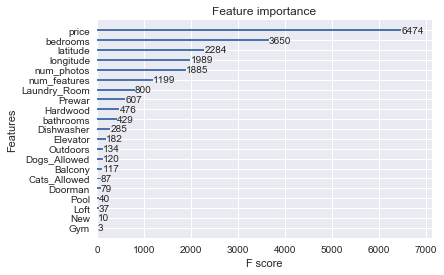

In [201]:
xgb.plot_importance(final_gb)

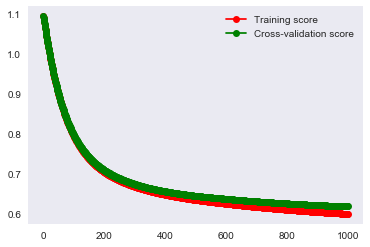

In [159]:
#plt.gca().invert_yaxis()
plt.grid()

#plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
 #                train_scores_mean + train_scores_std, alpha=0.1,
  #               color="r")
#plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 #test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(xcv.index, xcv['train-mlogloss-mean'], 'o-', color="r",
         label="Training score")
plt.plot(xcv.index, xcv['test-mlogloss-mean'], 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [160]:
preds1 = final_gb.predict(xgb.DMatrix(data=Xtest))

In [161]:
predsf = pd.DataFrame(preds1)
cols = ['high', 'medium', 'low']
predsf.columns = cols
predsf['listing_id'] = Xtest.index

predsf.to_csv('E:/rentalProject/submission.csv', index=None)
predsf

,high,medium,low,listing_id
0,0.078836,0.388638,0.532525,7142618
1,0.282597,0.383501,0.333902,7210040
2,0.017058,0.066674,0.916269,7103890
3,0.056733,0.289471,0.653797,7143442
4,0.054974,0.276737,0.668290,6860601
5,0.009406,0.016389,0.974205,6840081
6,0.073598,0.346727,0.579676,6922337
7,0.204693,0.496105,0.299202,6913616
8,0.149123,0.363371,0.487506,6937820
9,0.062481,0.267803,0.669716,6893933
